In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Normal Equation

Generate some linear-looking data to test **The Normal Equation**
<br>**The Normal Equation** is used to find a value of vector Theta that minimizes the MSE

In [2]:
np.random.seed(42)
m = 100 # Number of instances
X = 2 * np.random.rand(m, 1) # column Vector
y = 4 + 3 * X + np.random.randn(m, 1) # Column Vector

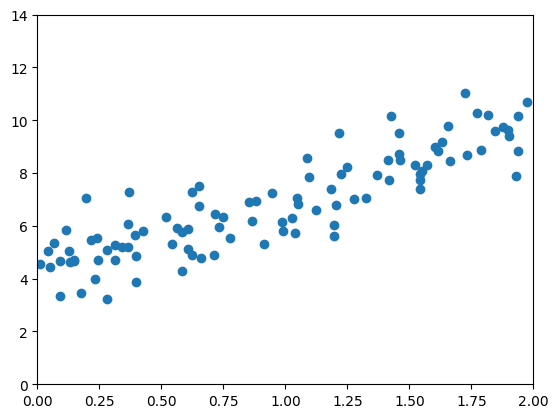

In [3]:
fig, ax = plt.subplots()

ax.scatter(x=X, y=y)
ax.set(xlim=(0, 2), ylim=(0,14))

plt.show()

Compute $ \hat\theta $ or the value of $ \theta $ that minimizes the cost function

In [4]:
from sklearn.preprocessing import add_dummy_feature

In [5]:
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y 
# The @ operator is the matrix product of two arrays or np.matmul

The generate data is y = 4 + 3*x1 + Gaussian Noise <br>
That means that theta_best should return something close to  $ \theta 0 $ = 4 and $ \theta 1 $ = 3

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
# Make predictions based on theta_best
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

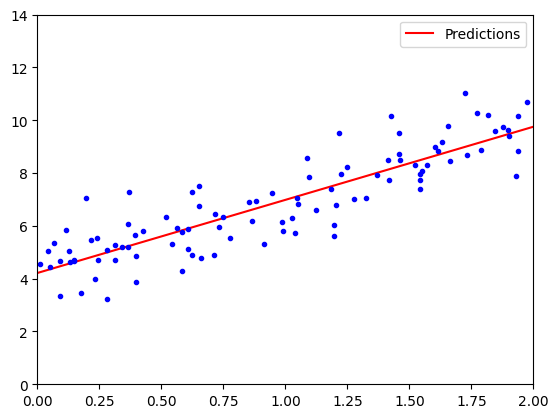

In [8]:
fig, ax = plt.subplots()

ax.plot(X_new, y_predict, "r-", label='Predictions')
ax.plot(X,y, "b.")

ax.set(xlim=(0,2), ylim=(0,14))
ax.legend()
plt.show()

## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [10]:
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
# Same coef from the Normal Equation

[4.21509616] [[2.77011339]]


In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient Descent
### Batch Gradient Descent

In [12]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # Learning Schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)

In [16]:
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # For SG, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [17]:
theta

array([[4.21076011],
       [2.74856079]])

In [18]:
# SGD in scikit-learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel()) 

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Polynomial Regression

In [20]:
# Generate non-linear data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

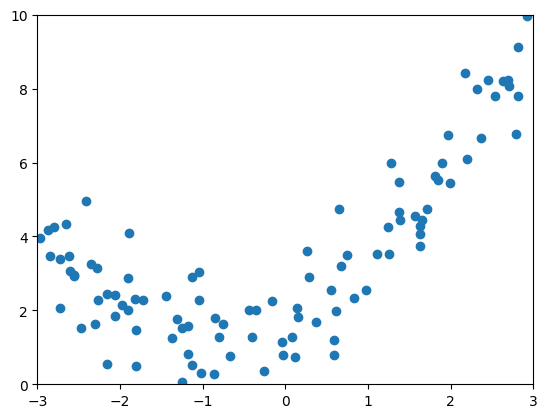

In [21]:
fig, ax = plt.subplots()

ax.scatter(x=X, y=y)
ax.set(xlim=(-3, 3), ylim=(0,10))

plt.show()

In [22]:
# Turn the features into polynomial features by multiplying them together
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [23]:
X[0]

array([-0.75275929])

In [24]:
X_poly[0]
# First column is regular X and 2nd column is X^2

array([-0.75275929,  0.56664654])

In [25]:
# Now you can fit regular linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

The Model estimated $ \hat{\textbf{y}} = 0.56x^2 + 0.93x + 1.78 + $Gaussian noise <br>
The actually function was $ y = 0.5x^2 + 1.0x + 2.0 + $Gaussian noise 

## Learning Curves <br>
Learning Curves help to see if a model is underfitting or overfitting

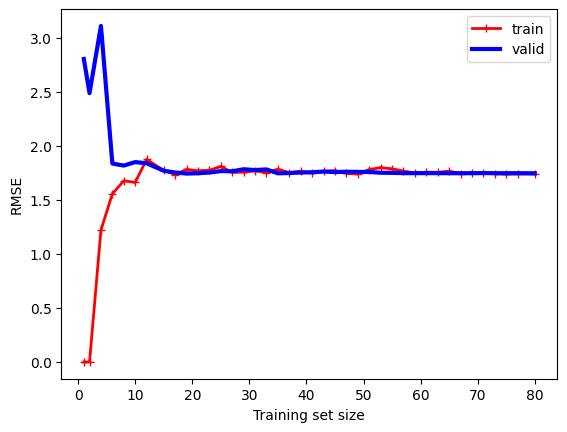

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
ax.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
ax.set_ylabel("RMSE")
ax.set_xlabel("Training set size")
ax.legend()
plt.show()

This model is underfitting

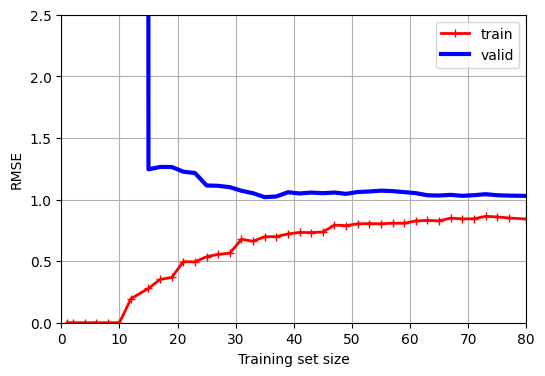

In [27]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

In [28]:
# Lower Error & Gap between the curves(This means that the model performs significantly
# better on the training data than on the validation data)

## Regularized Linear Models

### Ridge Regression

Ridge Regression uses an $ \alpha $ parameter to minimize the model's varience ($\theta 1$ to $\theta n$) by increasing the bias $\theta 0$
<br> Data needs to be scaled in order for Ridge to work

In [29]:
from sklearn.linear_model import Ridge

Ridge using closed-form solution

In [30]:
ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

Ridge using stochastic gradient descent

In [31]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1 / m, tol=None,
                      max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

### Lasso Regression

Lasso uses a $l1$ norm which is added to the cost function<br>
An important feature of Lasso is it sometimes zeros out the weights of uninportant features

In [32]:
from sklearn.linear_model import Lasso

In [33]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [34]:
# Can use SGD instead
sgd_reg = SGDRegressor(penalty='l1', alpha=0.1)

### Elastic Net Regression

Elastic Net is a middle ground between Lasso and Ridge <br> 
It is a weighted sum between Lasso and Ridge, if r = 0 then its just Ridge and if r = 1 then its just Lasso

In [35]:
from sklearn.linear_model import ElasticNet

In [36]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

#### When To chose between E-Net, Lasso, Ridge, or Regular Linear Regression <br>
Ridge is a good defualt choice. <br>
If you have only some useful features, not all of them, then Lasso or E-Net is better. <br>
Standard Linear regression should generally be avoided

## Early Stopping

Early stopping is used to stop training after the metric reaches a minimum and doesn't get better or starts to get worse(overfitting)

In [38]:
# Basic Early Stopping
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Create Quadratic Data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                             StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    # Go one step in the fitting process
    sgd_reg.partial_fit(X_train_prep, y_train)
    
    # Test model on validation data
    y_valid_predict = sgd_reg.predict(X_valid_prep)

    # Get RMSE
    val_error = np.sqrt(mean_squared_error(y_valid, y_valid_predict))
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
    # This doesn't stop early but it just saves the best model out of the epochs

## Logistic Regression

Logistic Regression is a linear model that can do binary classification

Example Dataset

In [39]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [41]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

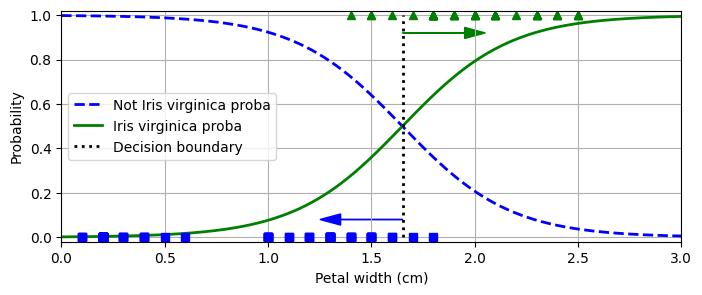

In [45]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [46]:
decision_boundary

1.6516516516516517

In [50]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])